In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
sessionInfo()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.2 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /tscc/nfs/home/ssharvey/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.2.0    Seurat_5.0.1       SeuratObject_5.0.1 sp_2.1-3          
[5] dplyr_1.1.4       

loaded via a namespace (and not attached):
  [1] deldir_2.0-4           pbapply_1.7-2        

In [3]:
data <- readRDS("FAT7_SoupX_scT_Integrate_052624.rds")
data

An object of class Seurat 
57572 features across 200370 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



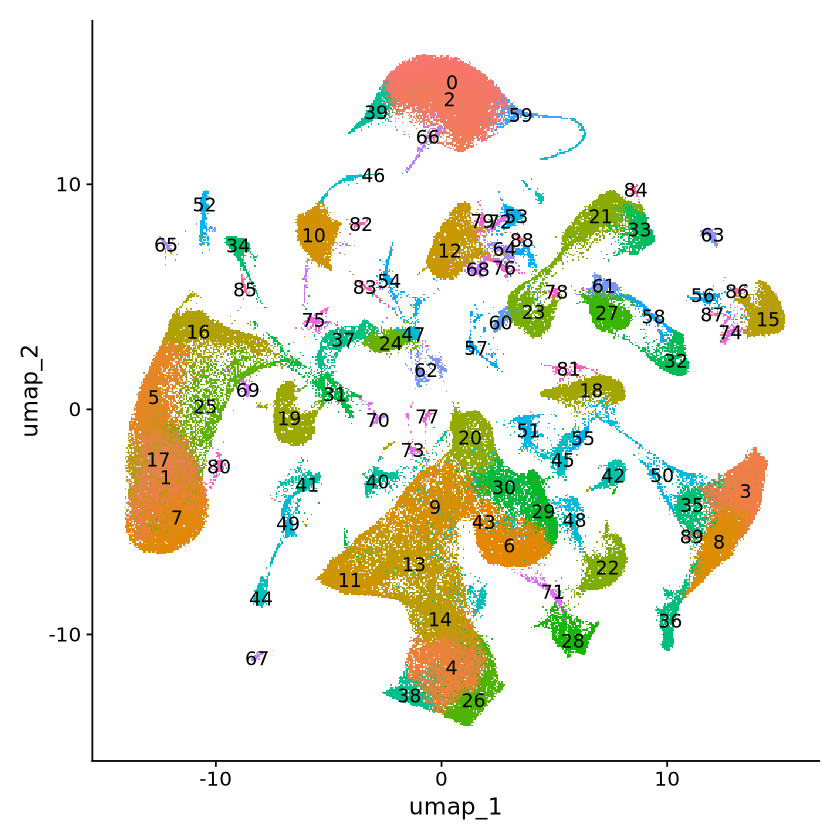

In [4]:
DimPlot(data, label = TRUE) + NoLegend()

In [5]:
data

An object of class Seurat 
57572 features across 200370 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

In [6]:
data <- PrepSCTFindMarkers(data)

Found 16 SCT models. Recorrecting SCT counts using minimum median counts: 3347



In [7]:
#find markers for every cluster compared to all remaining cells, report only positive ones
data.markers <- FindAllMarkers(data, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34

Calculating cluster 35

Calculating cluster 36

Calculating cluster 37

Calculating cluster 38

Calculating cluster 39

Calculating cluster 40

Calculating cluster 41

Ca

In [8]:
data.markers <- data.markers %>%
                group_by(cluster) %>%
                dplyr::filter(avg_log2FC > 1)

In [9]:
head(data.markers)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene      
1 0     4.356744   0.977 0.091 0         0       St18      
2 0     4.430403   0.955 0.086 0         0       Prr5l     
3 0     3.954659   0.984 0.131 0         0       Plp1      
4 0     3.650185   0.906 0.114 0         0       Mobp      
5 0     3.563765   0.986 0.204 0         0       Mbp       
6 0     4.117553   0.854 0.076 0         0       D7Ertd443e

In [10]:
data.markers %>%
    slice_head(n = 10) %>%
    ungroup() -> top10

In [11]:
top10

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene         
1   0             4.356744   0.977 0.091 0             0       St18         
2   0             4.430403   0.955 0.086 0             0       Prr5l        
3   0             3.954659   0.984 0.131 0             0       Plp1         
4   0             3.650185   0.906 0.114 0             0       Mobp         
5   0             3.563765   0.986 0.204 0             0       Mbp          
6   0             4.117553   0.854 0.076 0             0       D7Ertd443e   
7   0             3.093603   0.960 0.205 0             0       Zfp536       
8   0             3.414935   0.960 0.220 0             0       Dock10       
9   0             3.982450   0.833 0.124 0             0       Rnf220       
10  0             3.985849   0.776 0.069 0             0       Aspa         
11  0             2.850289   0.956 0.176 0             1       Gm20713      
12  0             2.708053   0.977 0.206 0             1       Prex2        
13  0             2.644827   0.961 0.202 0             1       Mertk        
14  0             2.721194   0.986 0.228 0             1       Slc1a3       
15  0             2.344746   0.980 0.239 0             1       Ptprz1       
16  0             2.839163   0.887 0.156 0             1       Nhsl1        
17  0             2.284256   0.925 0.195 0             1       Atp1a2       
18  0             2.788437   1.000 0.274 0             1       Gpc5         
19  0             2.438905   0.887 0.192 0             1       Plpp3        
20  0             2.731380   0.840 0.148 0             1       Gli3         
21  0             2.506373   0.864 0.112 0             2       St18         
22  0             2.691150   0.899 0.150 0             2       Plp1         
23  0             2.957821   0.853 0.107 0             2       Prr5l        
24  0             2.549003   0.923 0.222 0             2       Mbp          
25  0             2.333913   0.874 0.223 0             2       Zfp536       
26  0             2.475931   0.873 0.237 0             2       Dock10       
27  0             2.531280   0.742 0.136 0             2       Mobp         
28  0             3.041964   0.696 0.098 0             2       D7Ertd443e   
29  0             2.384959   0.904 0.361 0             2       St6galnac3   
30  0             3.099554   0.614 0.089 0             2       Aspa         
⋮   ⋮             ⋮          ⋮     ⋮     ⋮             ⋮       ⋮            
871  0.000000e+00 5.094545   0.459 0.014  0.000000e+00 87      Drd2         
872 4.669167e-247 4.209862   0.927 0.081 1.180692e-242 87      Rgs9         
873 1.036459e-241 4.505500   0.422 0.016 2.620894e-237 87      Sh3rf2       
874 9.991596e-216 4.147018   0.972 0.106 2.526575e-211 87      Rarb         
875 8.845530e-184 3.218555   0.569 0.037 2.236769e-179 87      Fyb          
876 8.861990e-177 3.744888   0.716 0.062 2.240931e-172 87      Actn2        
877 1.384985e-171 3.459504   0.431 0.023 3.502212e-167 87      Itgam        
878 4.319653e-170 3.431805   0.615 0.047 1.092311e-165 87      Stk32a       
879 1.133948e-159 2.696069   0.587 0.044 2.867414e-155 87      Inpp5d       
880 1.492807e-156 3.597303   0.936 0.131 3.774862e-152 87      Adcy5        
881  0.000000e+00 7.602018   0.521 0.004  0.000000e+00 88      B020031H02Rik
882  0.000000e+00 7.660700   0.448 0.003  0.000000e+00 88      Gm45680      
883  0.000000e+00 9.503091   0.052 0.000  0.000000e+00 88      Padi1        
884 7.771342e-219 4.324681   0.906 0.077 1.965139e-214 88      Reln         
885 1.325931e-197 3.859727   0.833 0.069 3.352881e-193 88      Vwc2l        
886 1.541219e-143 4.571735   0.594 0.048 3.897280e-139 88      8030451O07Rik
887 9.627861e-138 5.170935   0.292 0.012 2.434597e-133 88      Tex47        
888 6.962039e-136 4.700617   0.990 0.177 1.760491e-131 88      Foxp2        
889 4.718257e-131 3.203971   1.000 0.164 1.193106e-126 88      Adarb2       
890 2.614185e-120 5.541282   1.000 0.219 6.610490e-116 88      Zfp804b      


In [12]:
#export cluster markers
write.csv(top10, "top10_cluster_markers.csv")

#Now begin exploring known cell-type specific markers

In [13]:
#set default assay to SCT as this hold the layers raw, sct-normalized, and z-score normalized layers in Seurat v5
DefaultAssay(data) <- "SCT"

In [14]:
#begin identifying cell-types based on marker genes

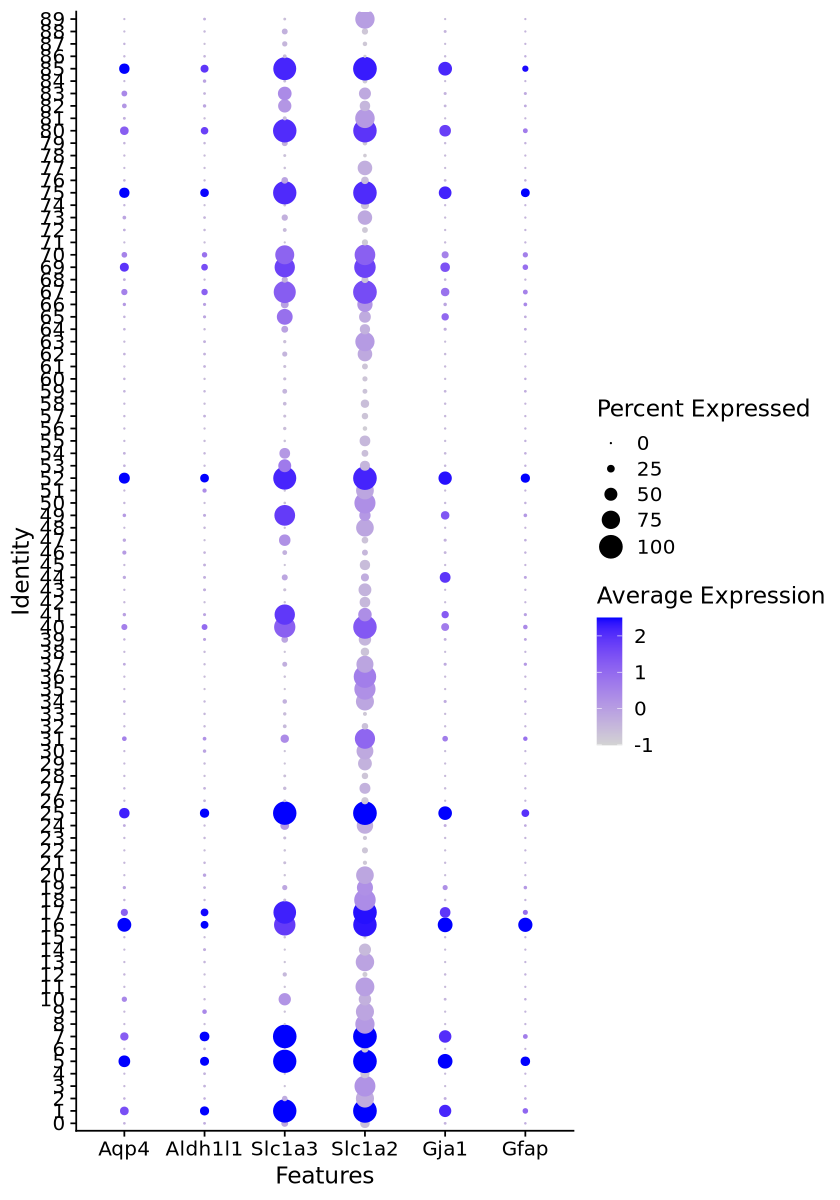

In [34]:
#astrocytes
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Aqp4",
"Aldh1l1",                           
"Slc1a3",
"Slc1a2",
"Gja1",
"Gfap"
))

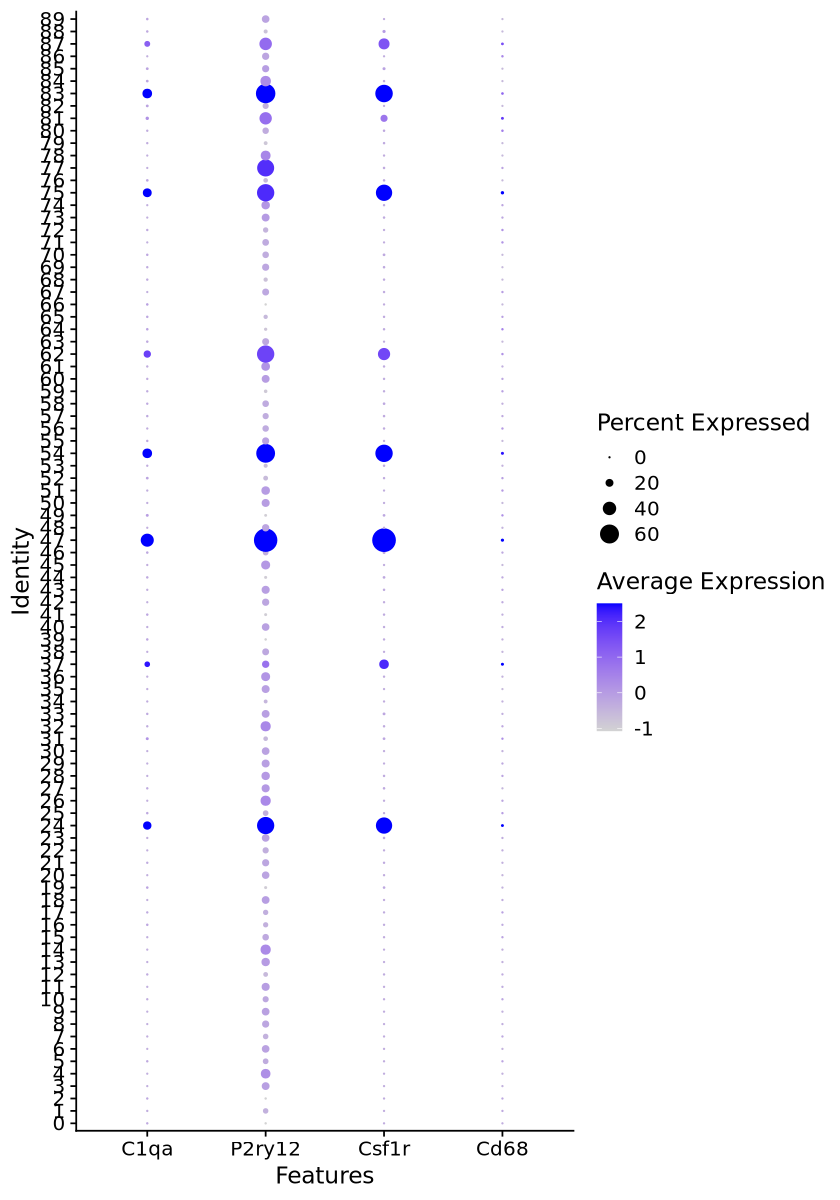

In [35]:
#microglia
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("C1qa",
"P2ry12",
"Csf1r",
"Cd68"
))

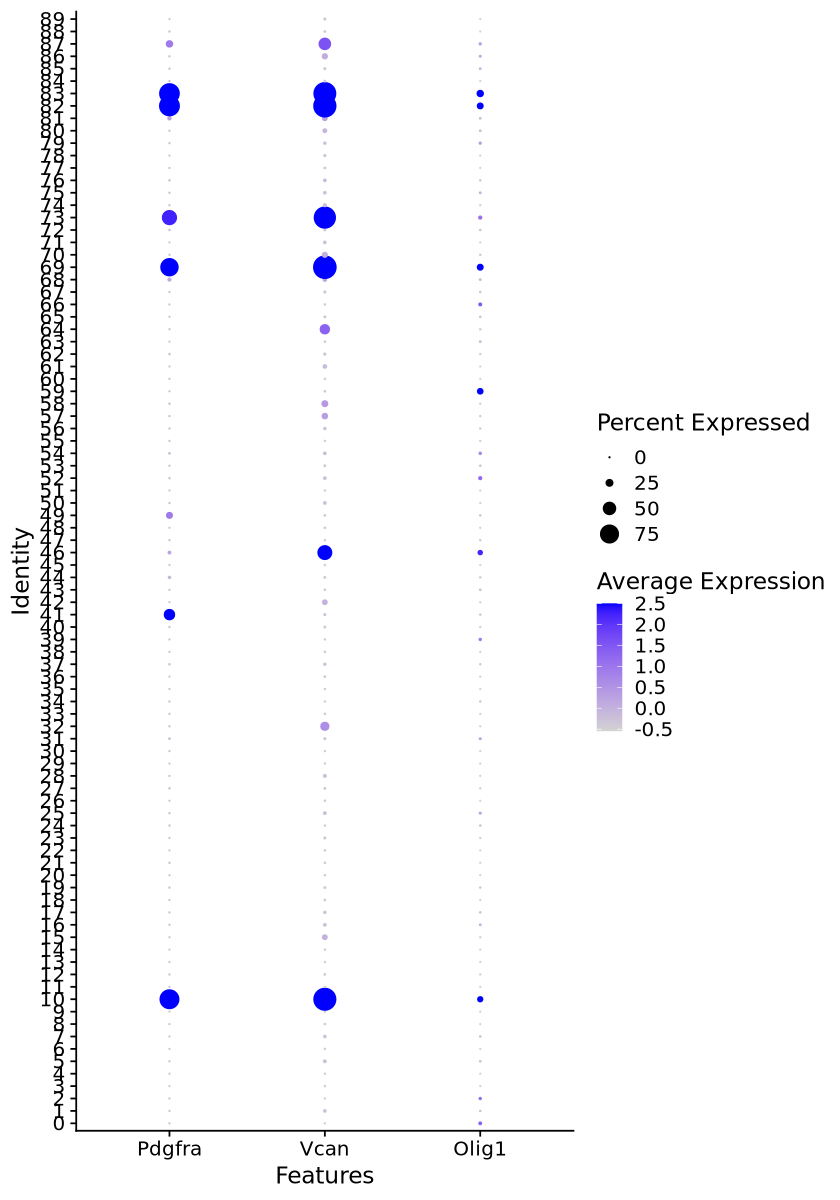

In [36]:
#OPCs
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Pdgfra",
"Vcan",
"Olig1"
))

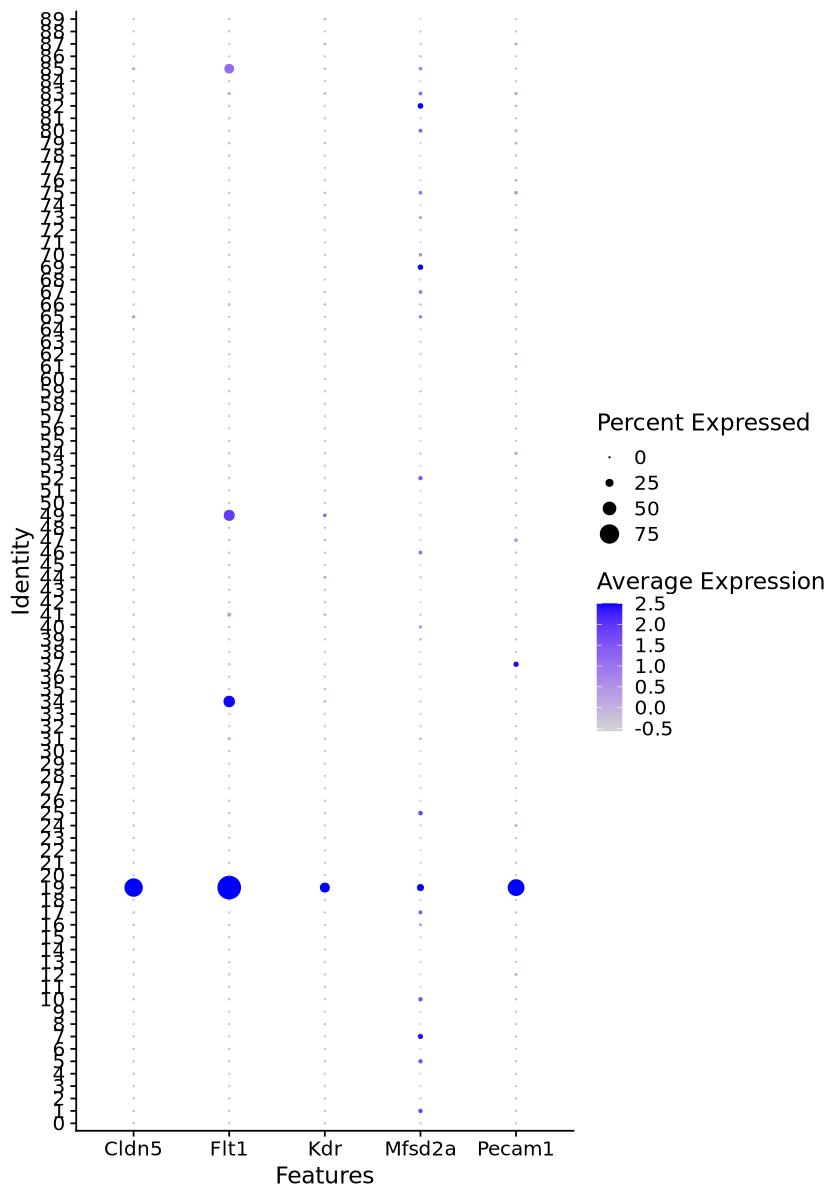

In [37]:
#endothelial cells
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Cldn5",
"Flt1",
"Kdr",
"Mfsd2a",
"Pecam1"
))

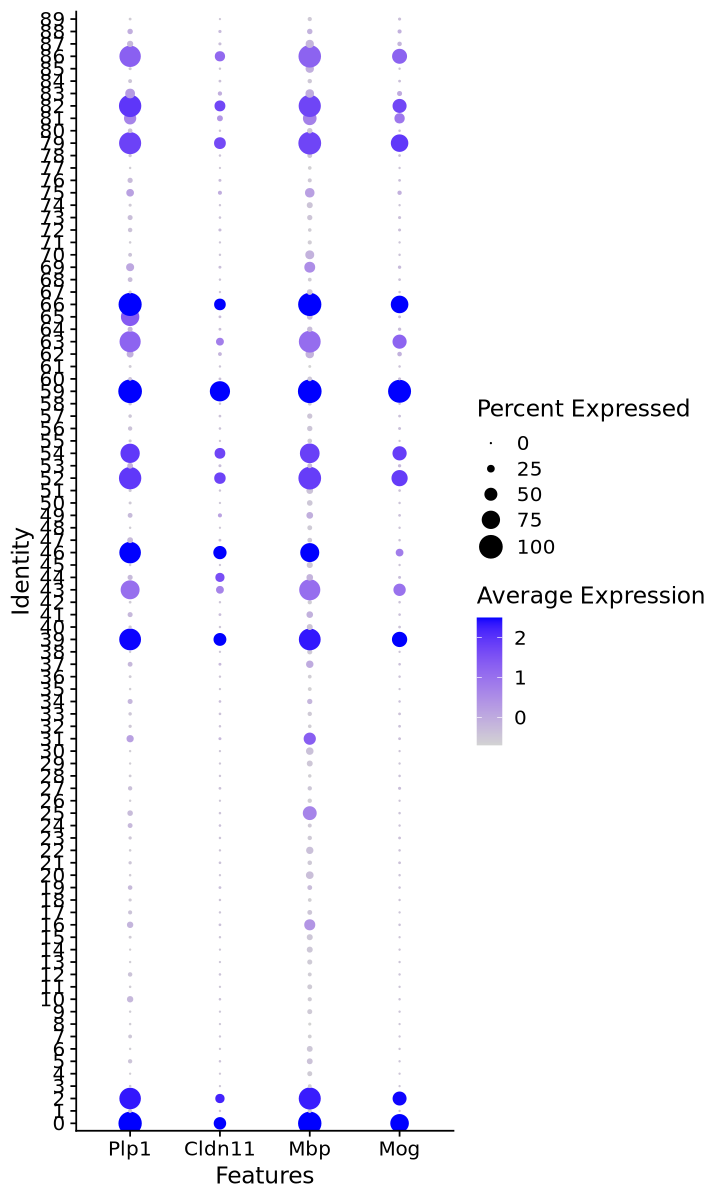

In [38]:
#oligodendrocytes
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Plp1", "Cldn11", "Mbp", "Mog")
)

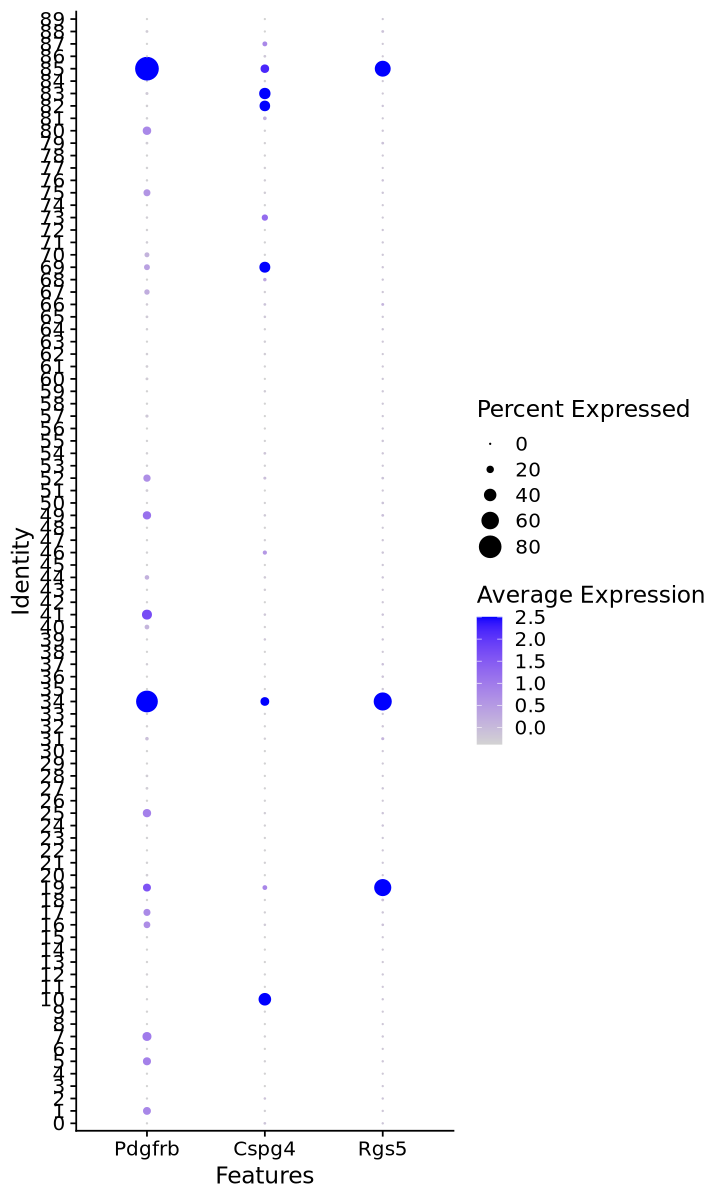

In [39]:
#pericytes and smcs
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Pdgfrb", "Cspg4", "Rgs5")
)

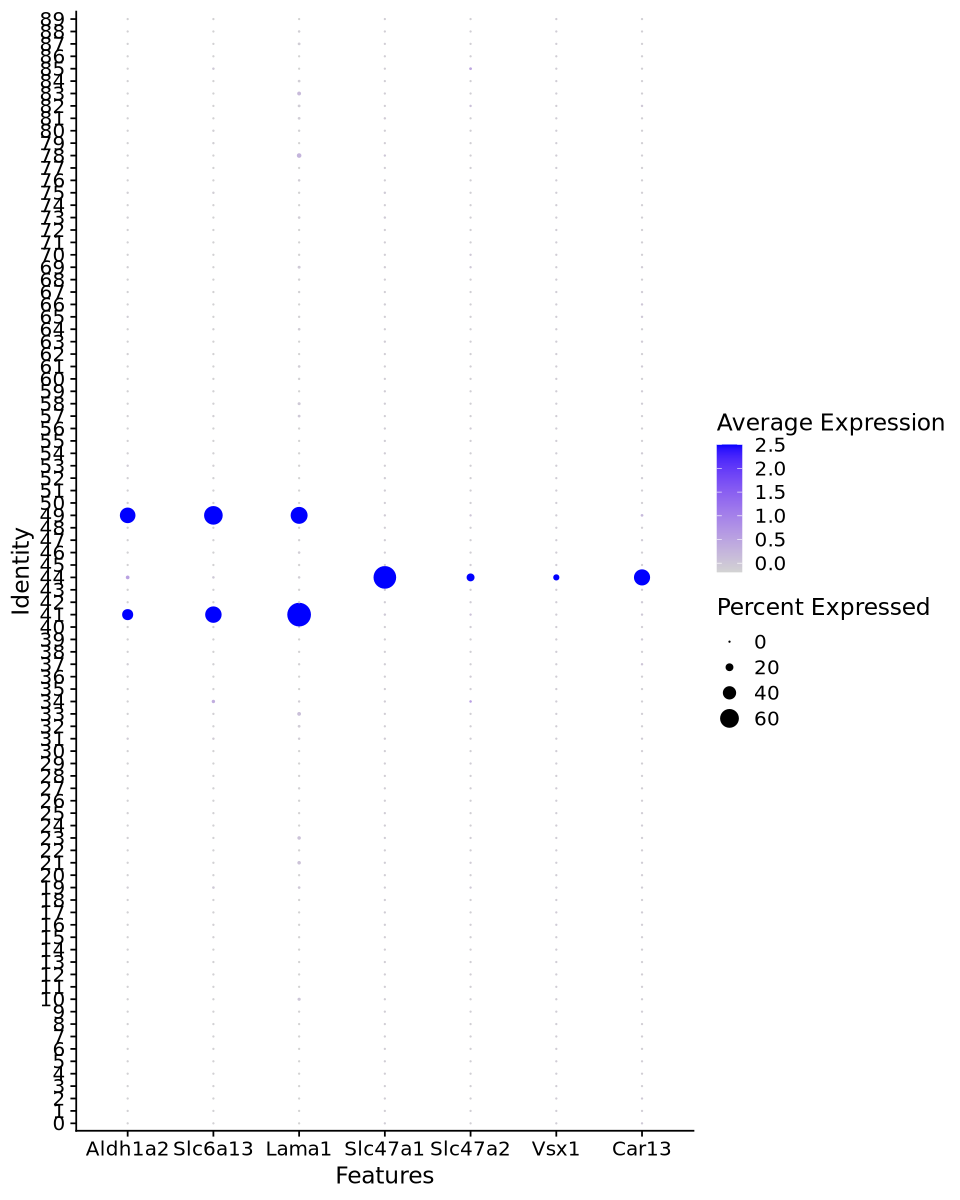

In [40]:
#Fibroblasts
options(repr.plot.width = 8, repr.plot.height = 10)
DotPlot(data, features = c("Aldh1a2", "Slc6a13", "Lama1", "Slc47a1", "Slc47a2", "Vsx1", "Car13")
)

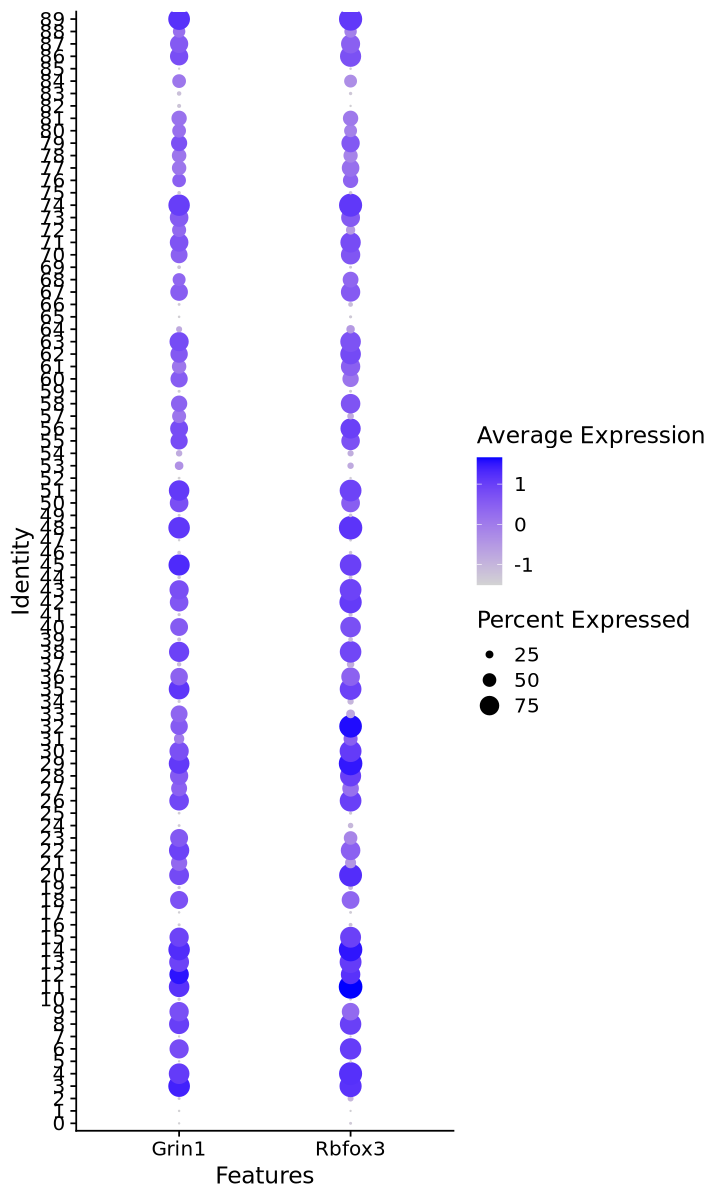

In [41]:
#pan-neuronal
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Grin1", "Rbfox3")
)

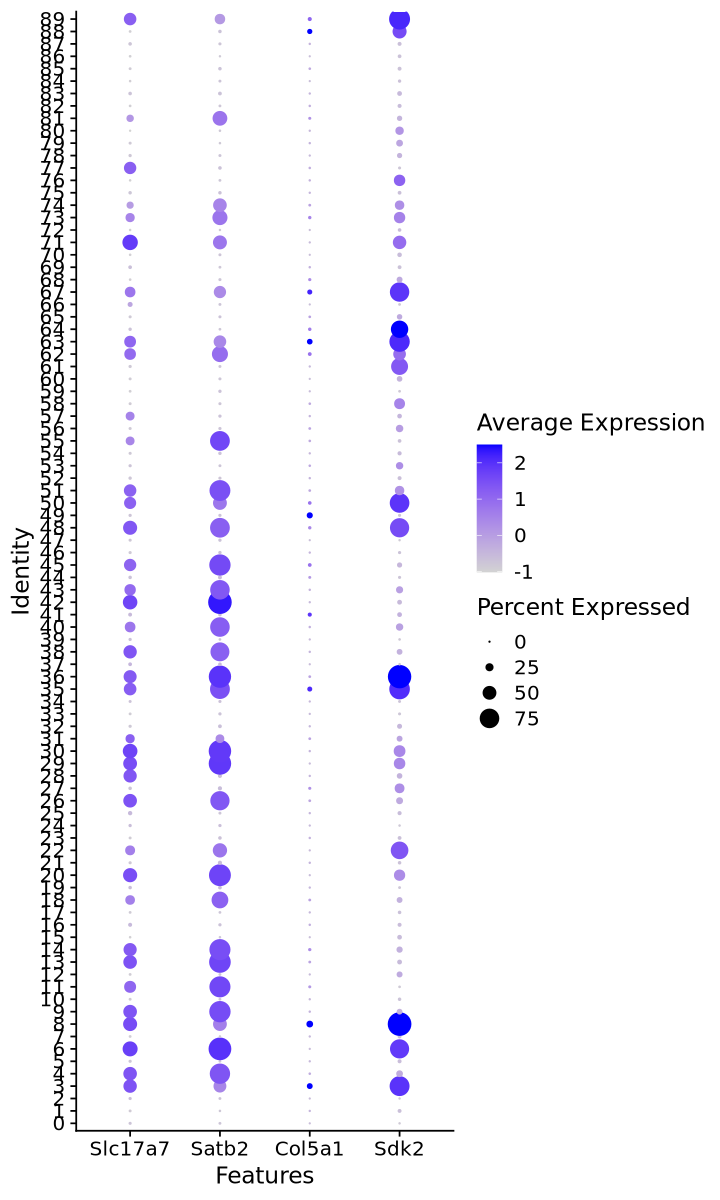

In [42]:
#excitatory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Slc17a7", "Satb2", "Col5a1", "Sdk2")
)

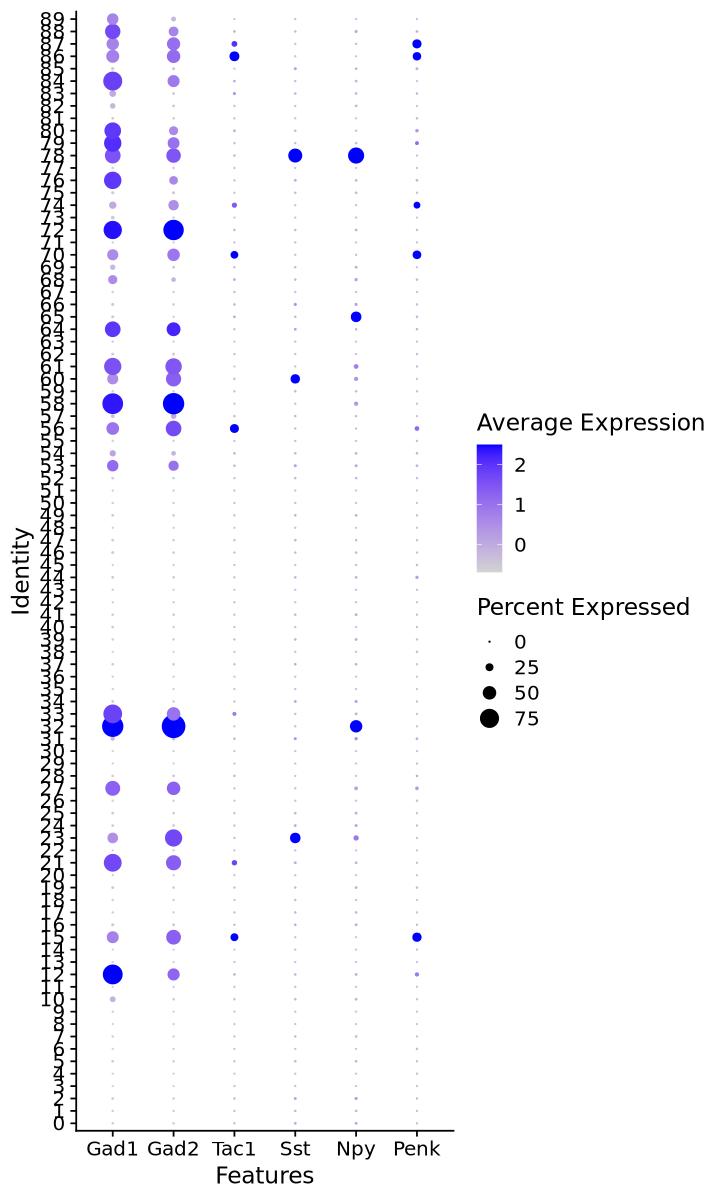

In [43]:
#inhibitory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Gad1", "Gad2", "Tac1", "Sst", "Npy", "Penk")
)

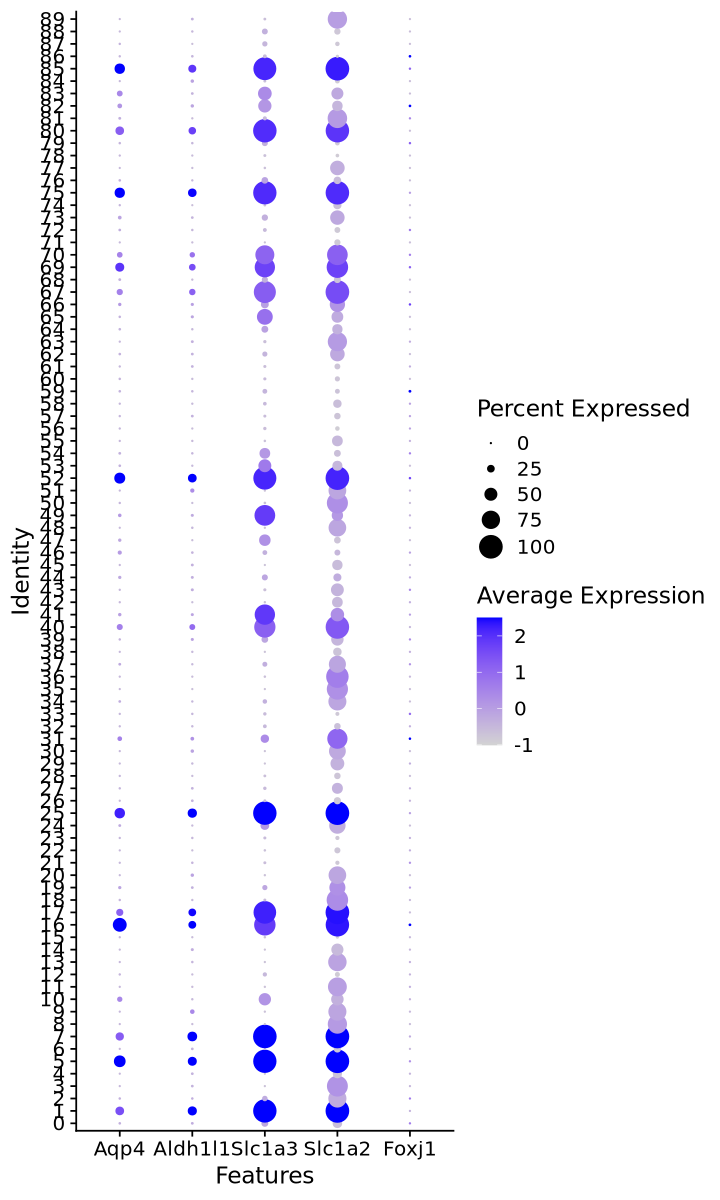

In [44]:
#Ependymal cells - additionally express FoxJ1 
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Aqp4",
"Aldh1l1",                           
"Slc1a3",
"Slc1a2",
"Foxj1"
))

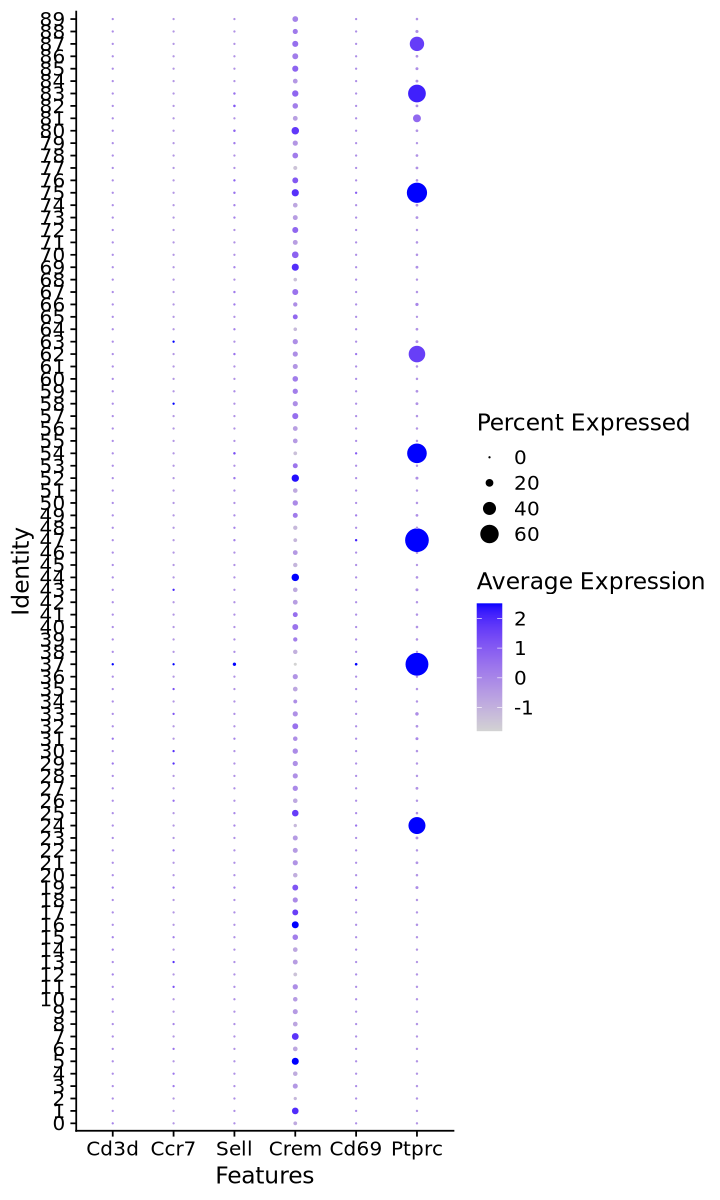

In [45]:
#T cells
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c(
"Cd3d", "Ccr7", "Sell", "Crem", "Cd69", "Ptprc"
))

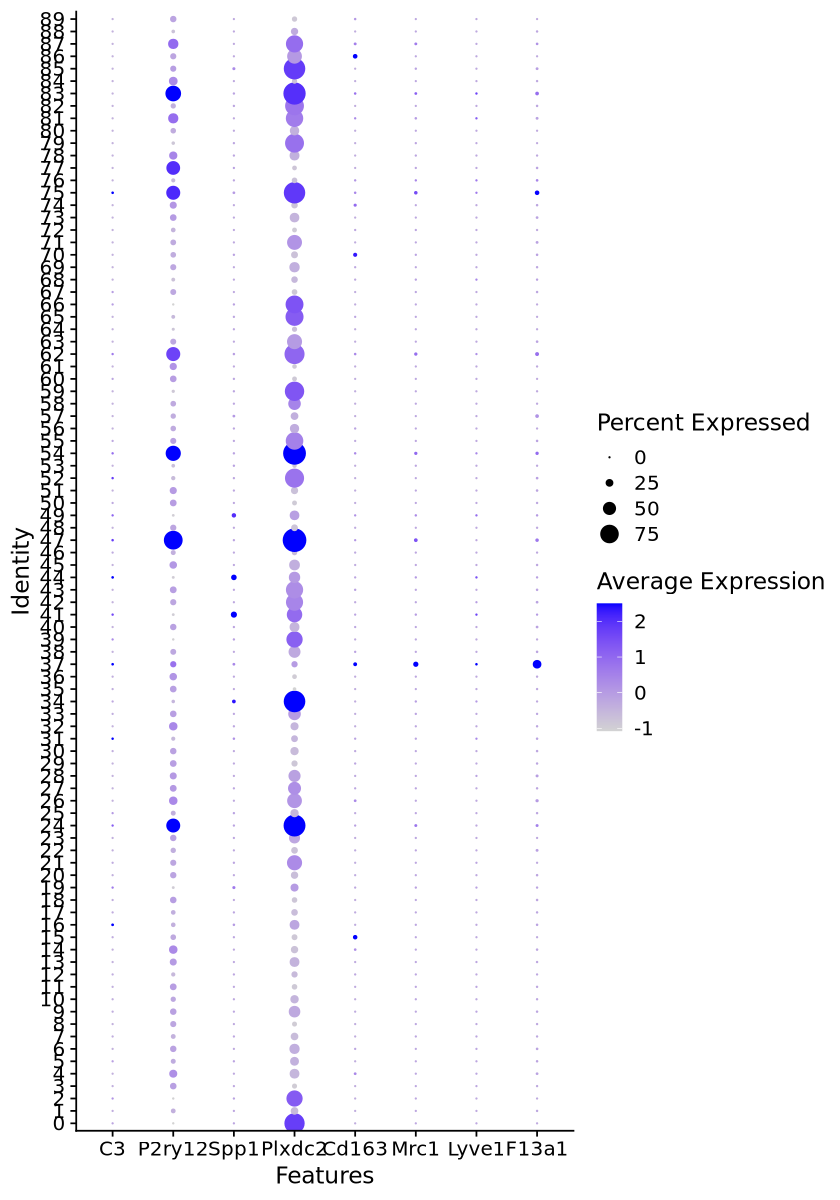

In [46]:
#Perivascular macrophage versus microglia
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c(
"C3", "P2ry12", "Spp1", "Plxdc2", "Cd163", "Mrc1", "Lyve1", "F13a1"
)
)

In [47]:
Idents(data) <- "seurat_clusters"

In [48]:
#remove doublet clusters identified manually
data_clean <- subset(data, idents = c(31,40,43,52,54,62,63,67,69,73,74,75,79,80,82,83,85,86,87,88,89), invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 190025 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



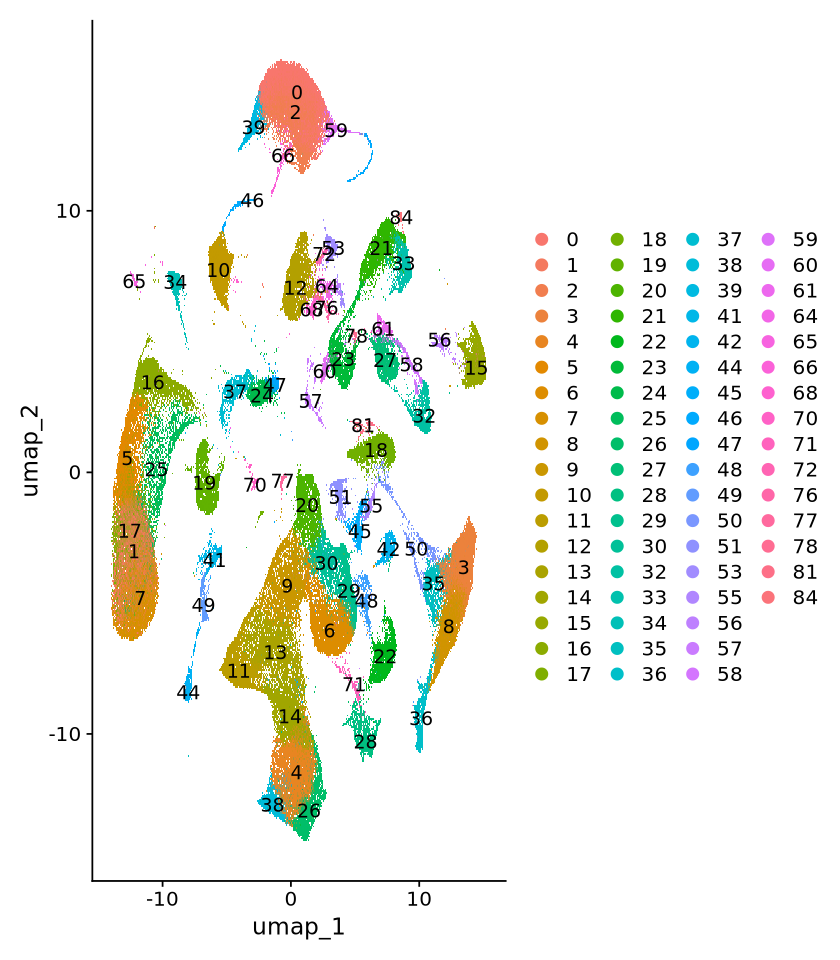

In [50]:
options(repr.plot.width = 7, repr.plot.height = 8)
DimPlot(data_clean, reduction = "umap", label = TRUE)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 190025
Number of edges: 7911520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 78
Elapsed time: 78 seconds


3 singletons identified. 75 final clusters.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



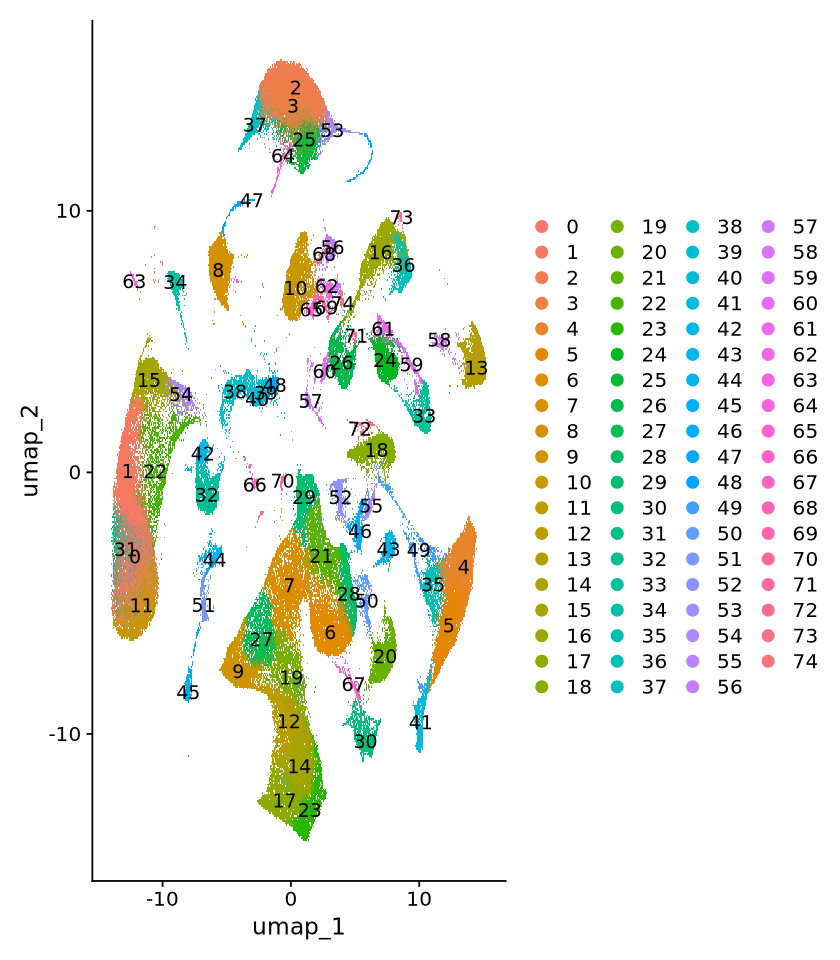

In [51]:
DefaultAssay(data_clean) <- "SCT"
#re-cluster filtered dataset
data_clean <- FindNeighbors(data_clean, reduction = "integrated.dr", dims = 1:30)
data_clean <- FindClusters(data_clean, resolution = 2)
DimPlot(data_clean, label = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:38:32 UMAP embedding parameters a = 0.9922 b = 1.112

22:38:32 Read 190025 rows and found 30 numeric columns

22:38:32 Using Annoy for neighbor search, n_neighbors = 30

22:38:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:38:56 Writing NN index file to temp file /tmp/RtmpBGyAxS/file134cb92fe5110

22:38:56 Searching Annoy index using 1 thread, search_k = 3000

22:40:15 Annoy recall = 100%

22:40:15 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

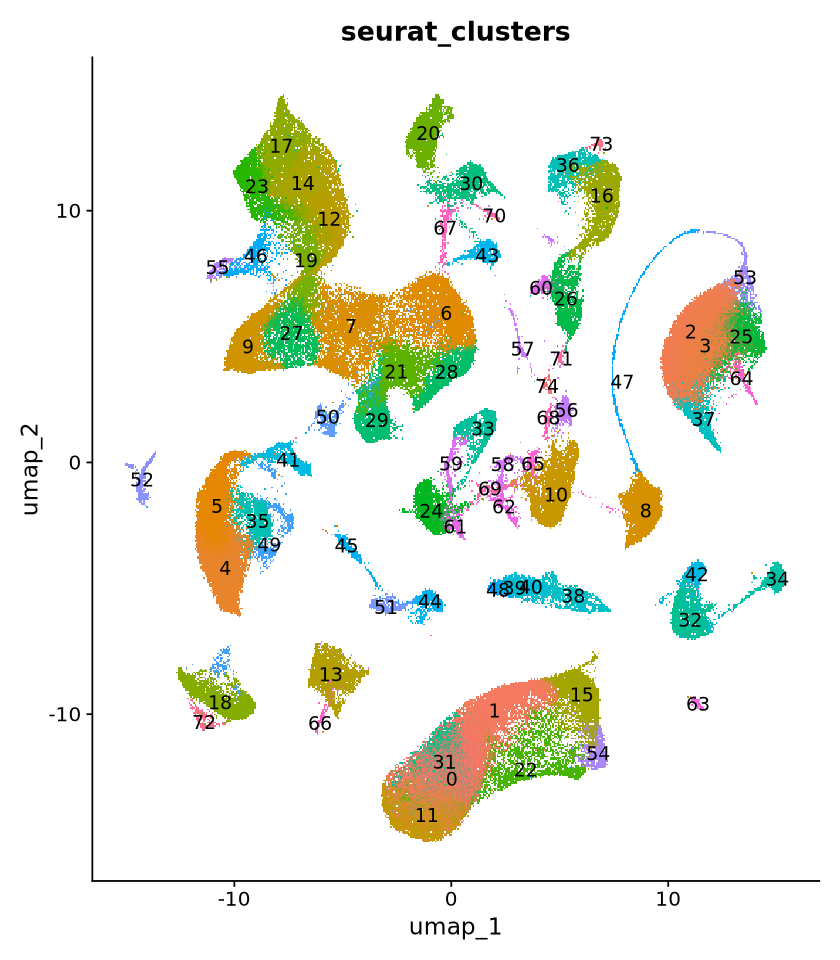

In [52]:
data_clean <- RunUMAP(data_clean, dims = 1:30, reduction = "integrated.dr")
DimPlot(data_clean, reduction = "umap", group.by = c("seurat_clusters"), label = TRUE) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



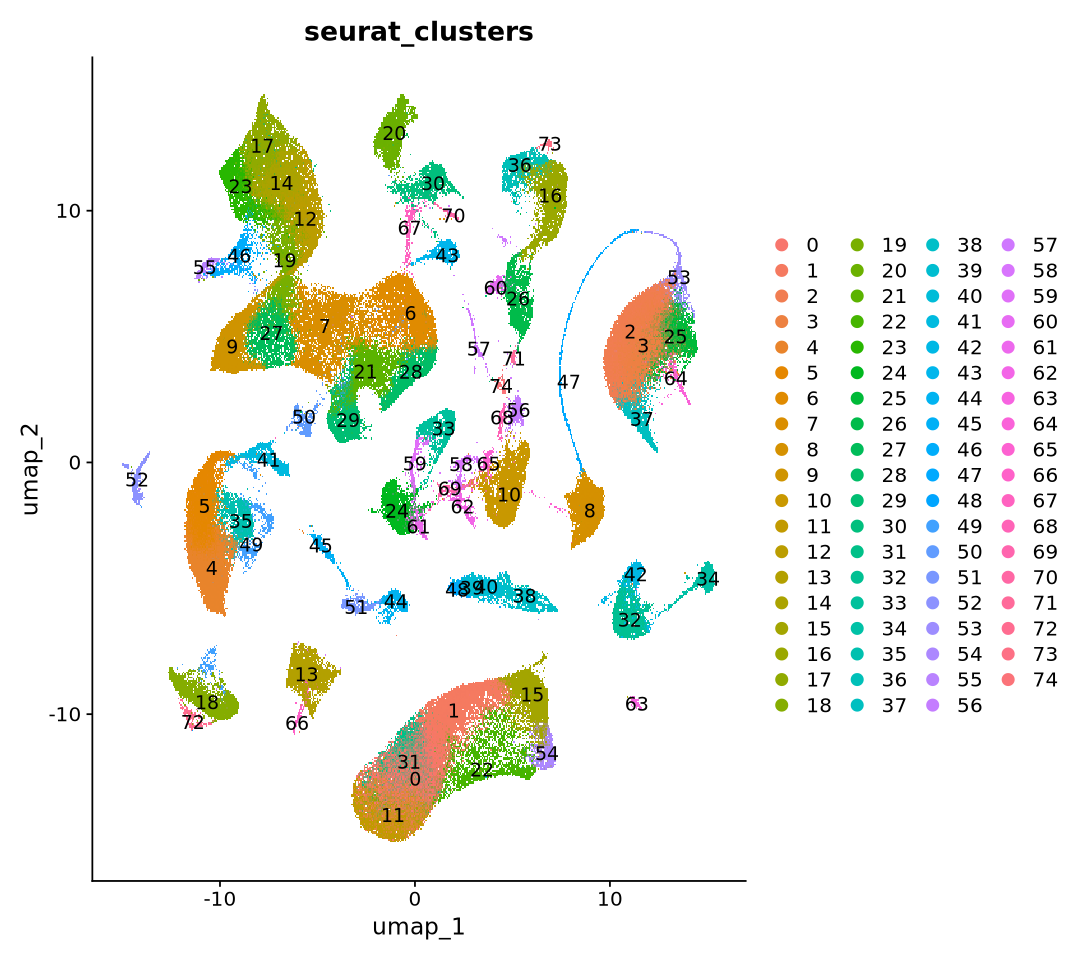

In [53]:
options(repr.plot.width = 9, repr.plot.height = 8)
DimPlot(data_clean, reduction = "umap", group.by = c("seurat_clusters"), label = TRUE)

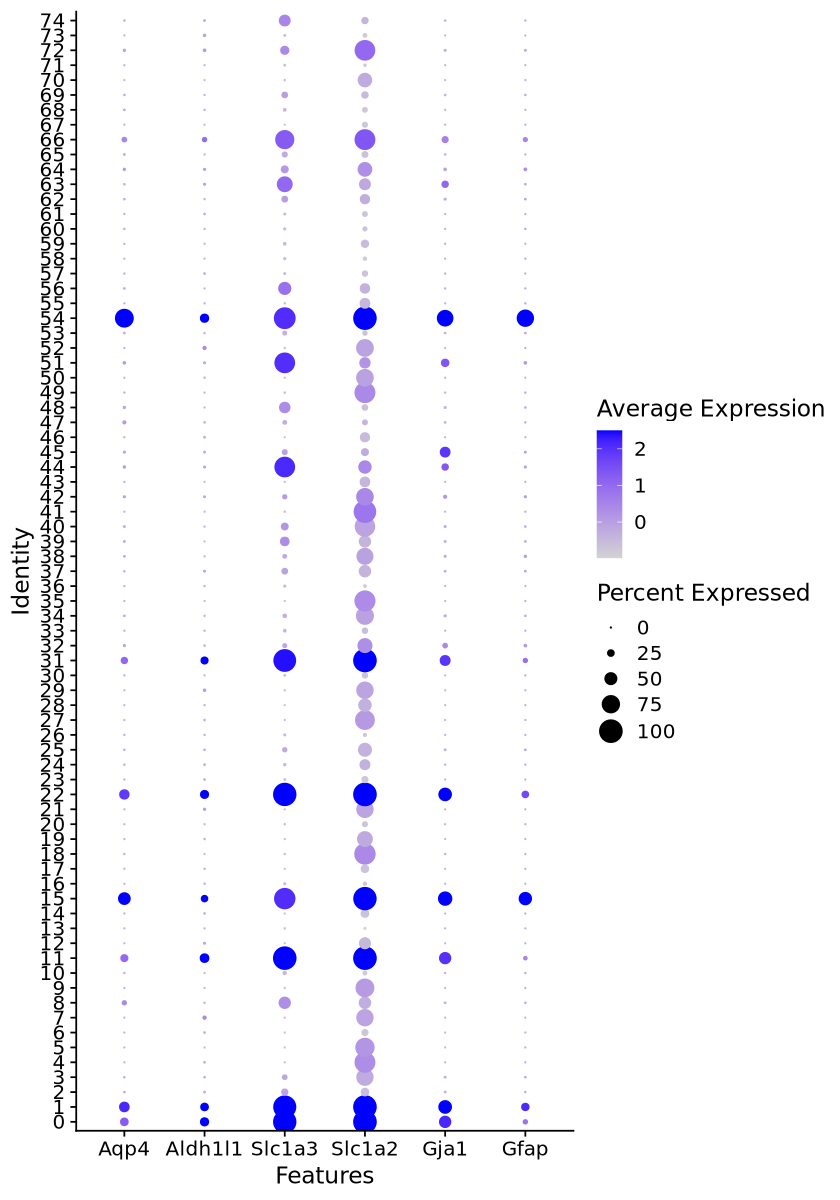

In [55]:
#astrocytes
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_clean, features = c("Aqp4",
"Aldh1l1",                           
"Slc1a3",
"Slc1a2",
"Gja1",
"Gfap"
))

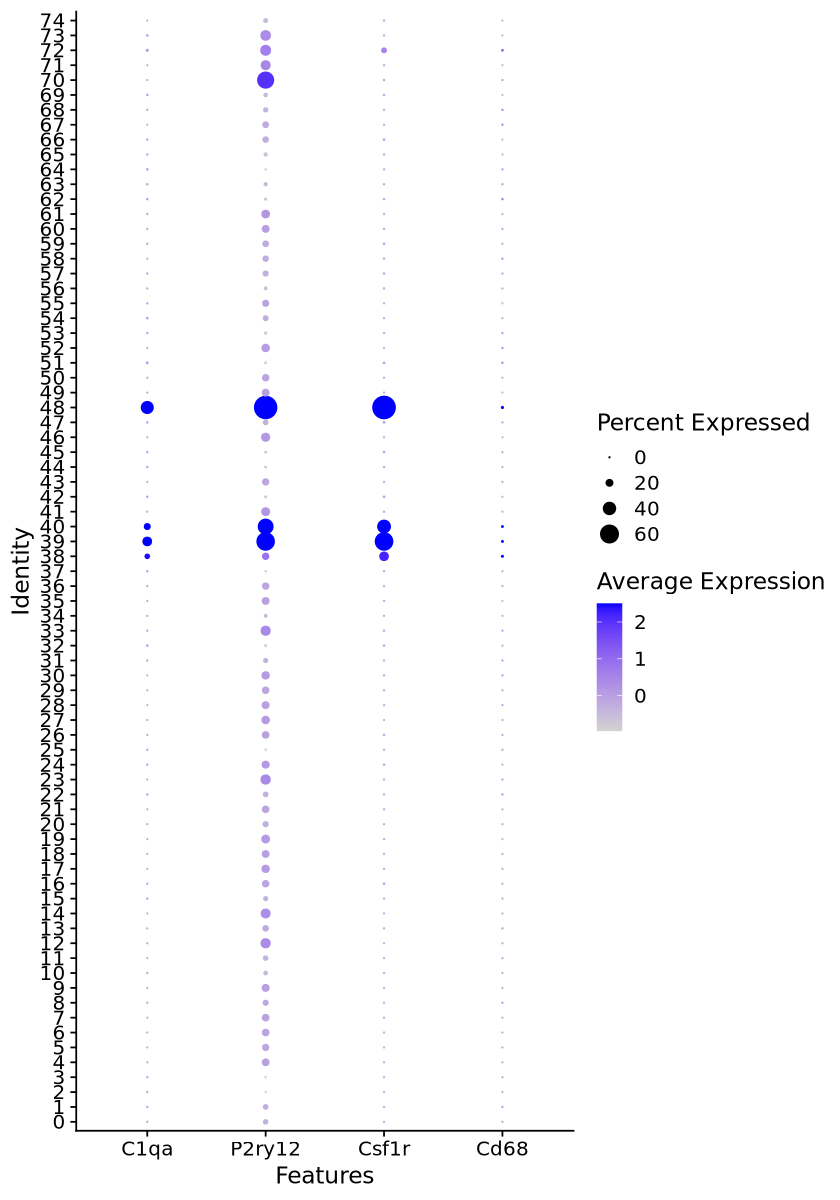

In [56]:
#microglia
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_clean, features = c("C1qa",
"P2ry12",
"Csf1r",
"Cd68"
))

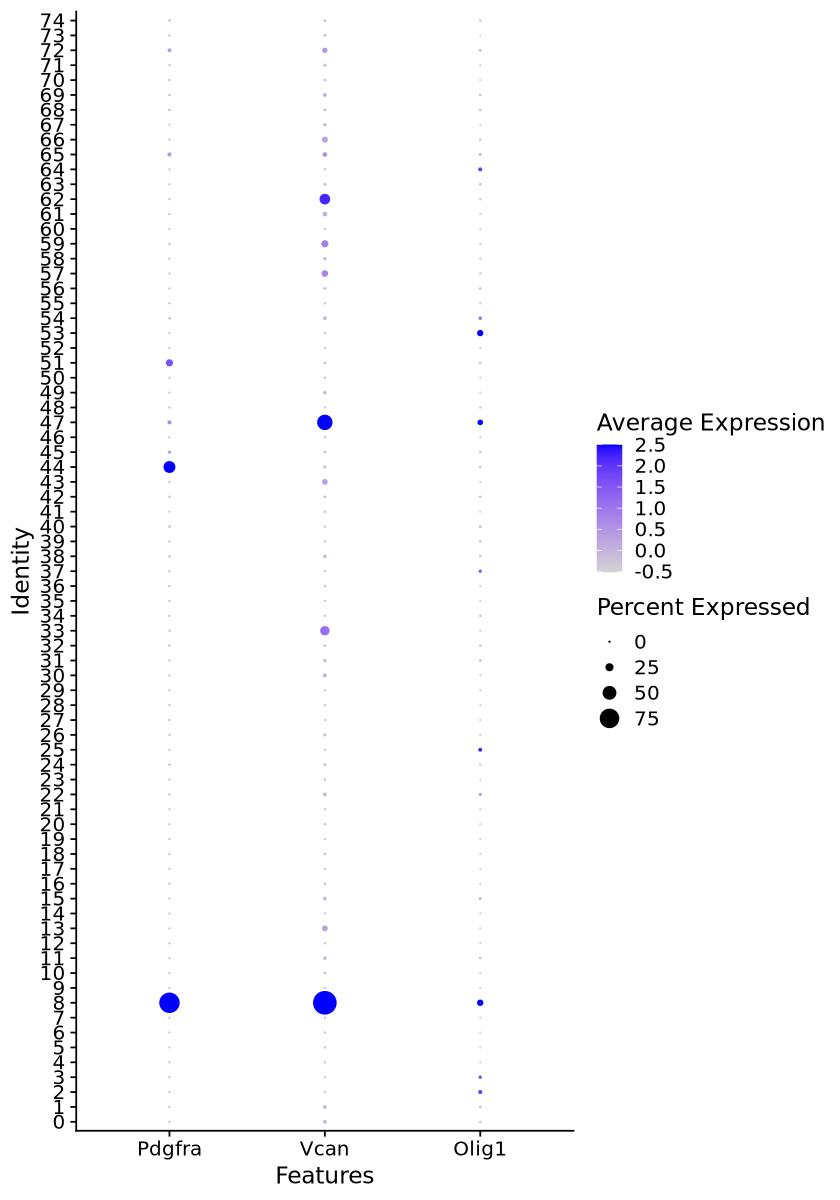

In [57]:
#OPCs
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_clean, features = c("Pdgfra",
"Vcan",
"Olig1"
))

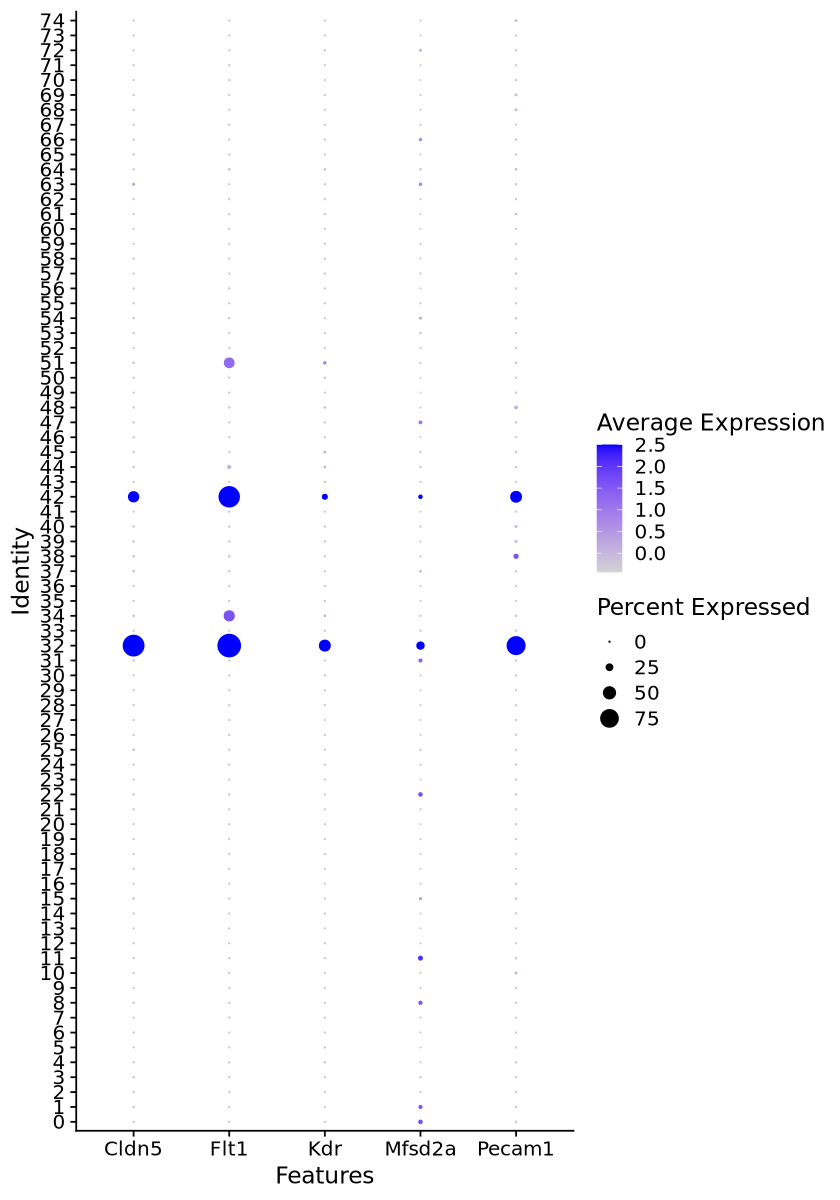

In [58]:
#endothelial cells
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_clean, features = c("Cldn5",
"Flt1",
"Kdr",
"Mfsd2a",
"Pecam1"
))

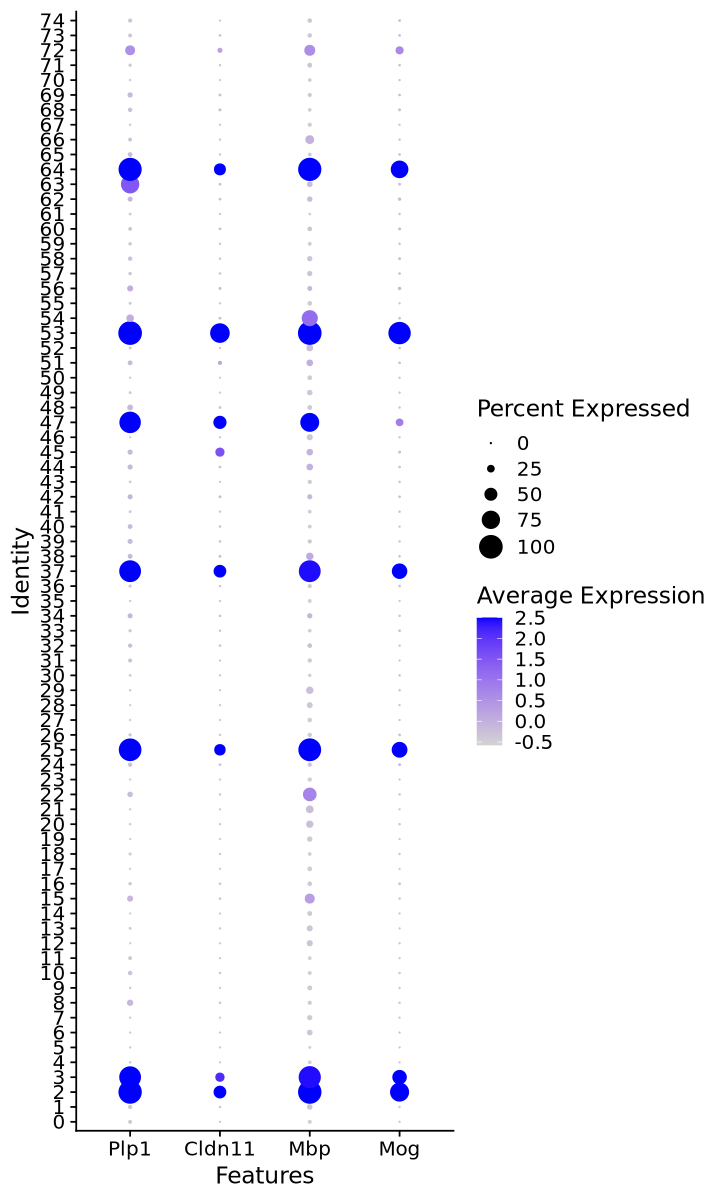

In [59]:
#oligodendrocytes
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_clean, features = c("Plp1", "Cldn11", "Mbp", "Mog")
)

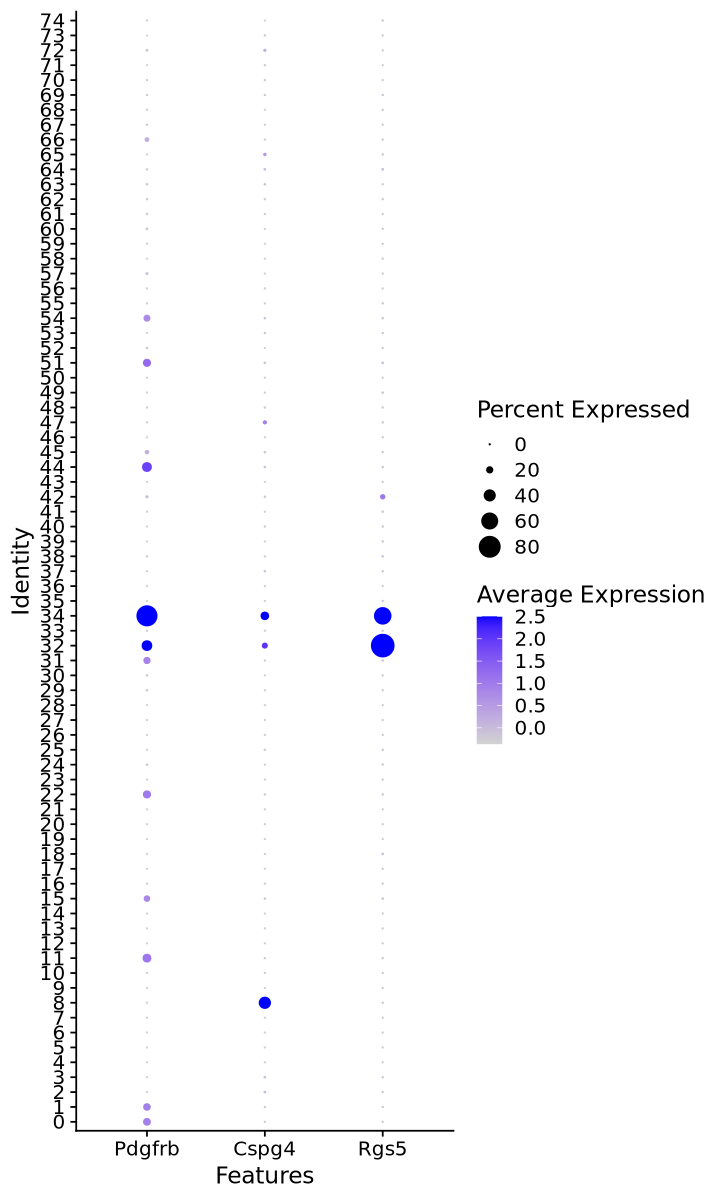

In [60]:
#pericytes and smcs
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_clean, features = c("Pdgfrb", "Cspg4", "Rgs5")
)

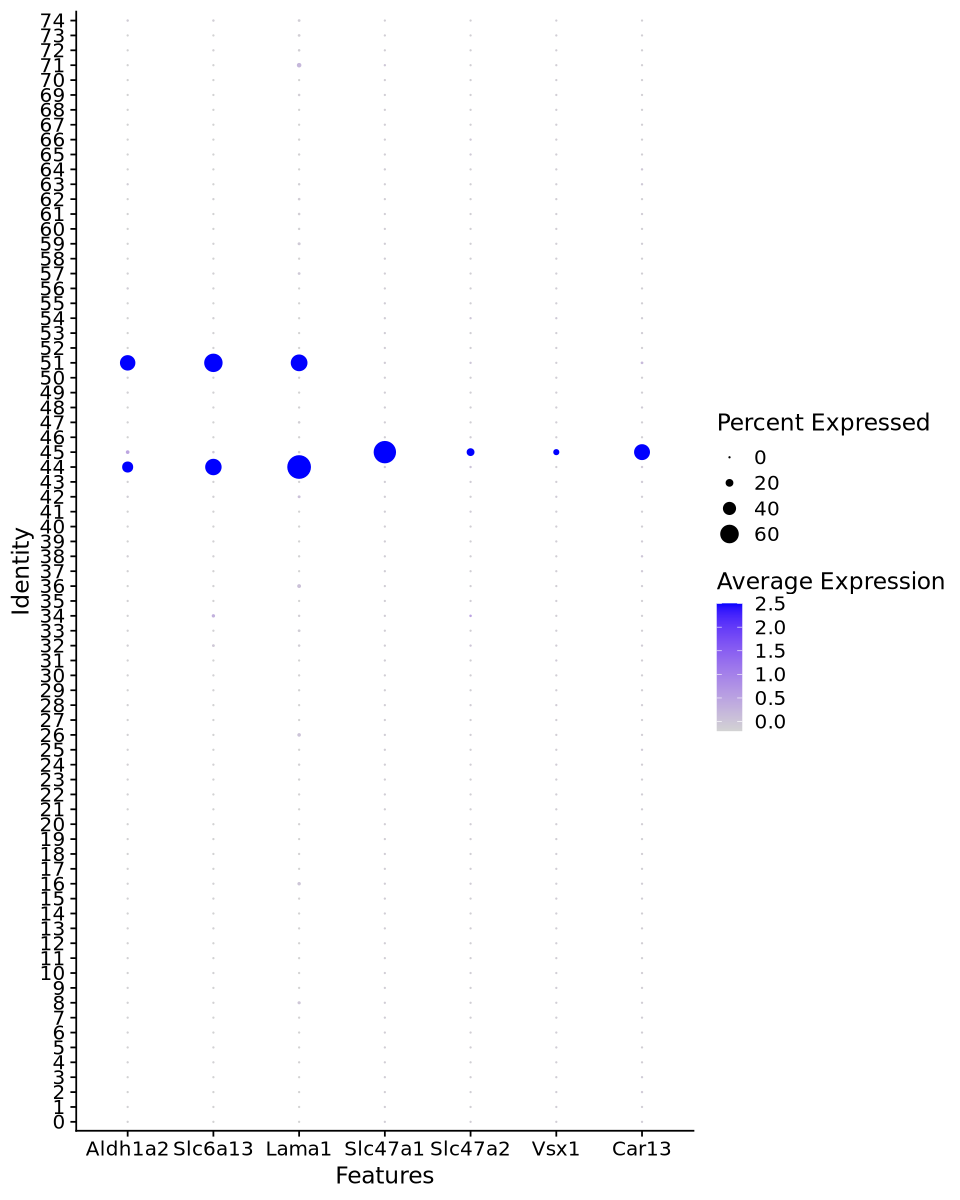

In [61]:
#Fibroblasts
options(repr.plot.width = 8, repr.plot.height = 10)
DotPlot(data_clean, features = c("Aldh1a2", "Slc6a13", "Lama1", "Slc47a1", "Slc47a2", "Vsx1", "Car13")
)

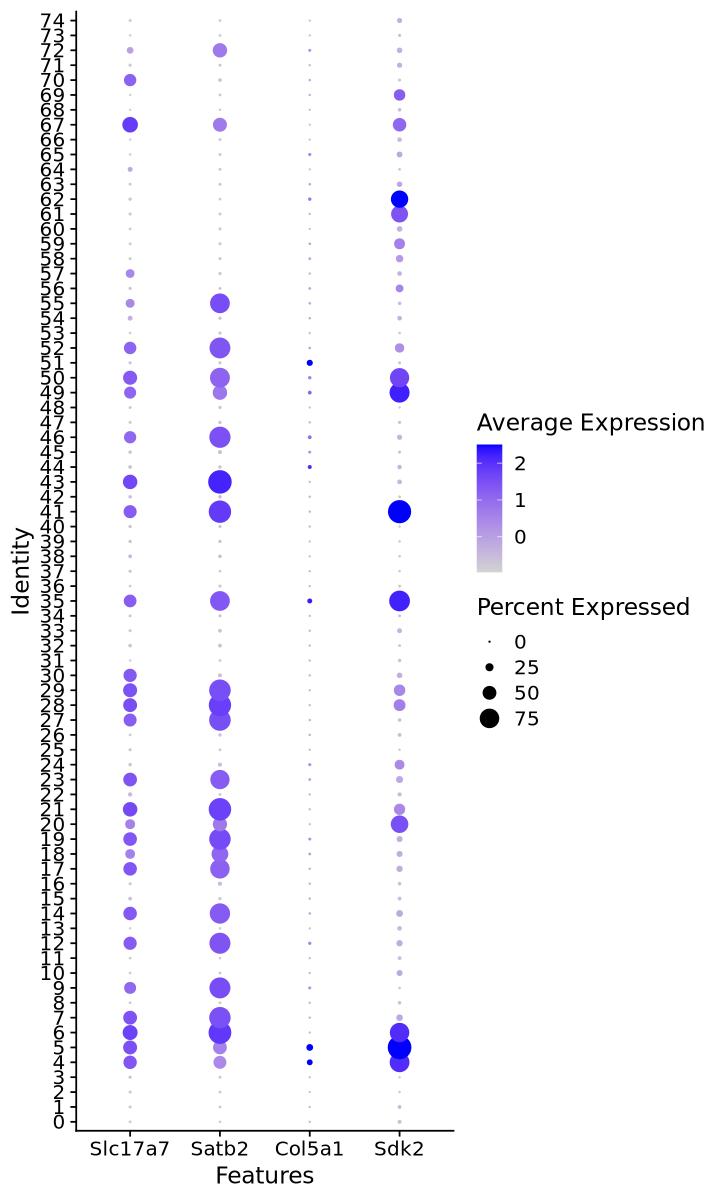

In [62]:
#excitatory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_clean, features = c("Slc17a7", "Satb2", "Col5a1", "Sdk2")
)

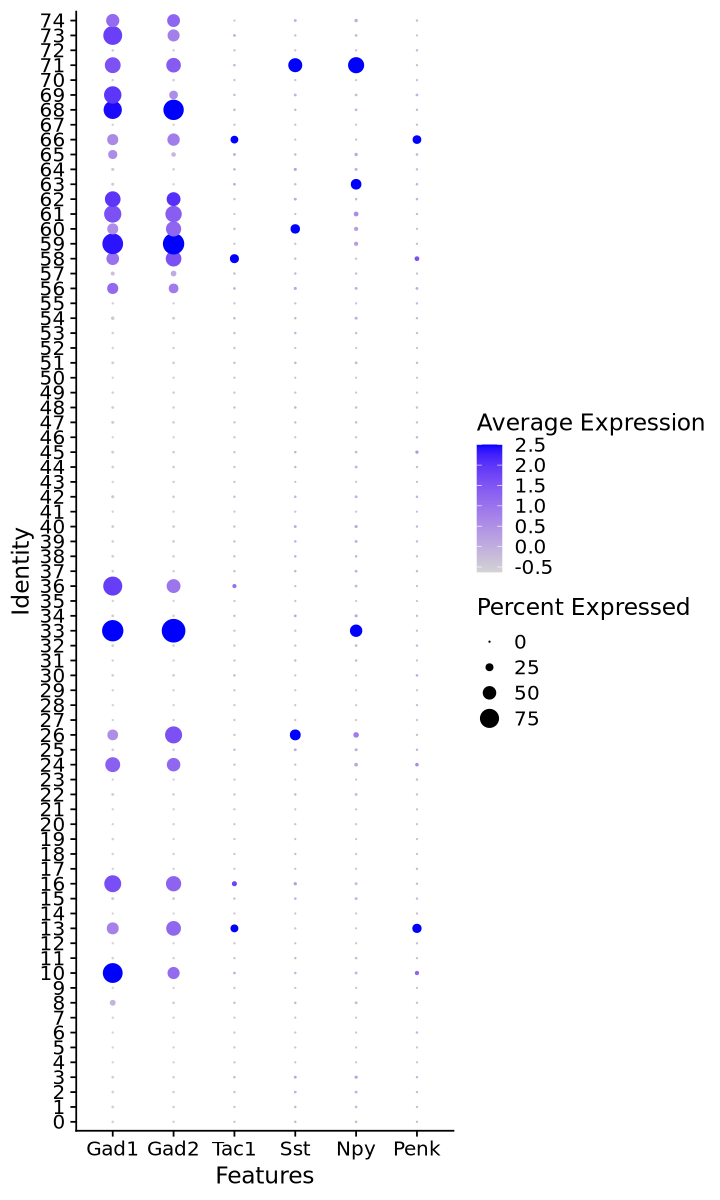

In [63]:
#inhibitory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_clean, features = c("Gad1", "Gad2", "Tac1", "Sst", "Npy", "Penk")
)

In [64]:
#remove doublet clusters identified manually
data_clean2 <- subset(data_clean, idents = c(47,52,57,63,66,67,70,72,56,58,60,62,65,66,69,71,73,74), invert = TRUE)
data_clean2

An object of class Seurat 
57572 features across 181968 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 181968
Number of edges: 7619339

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9123
Number of communities: 62
Elapsed time: 78 seconds


1 singletons identified. 61 final clusters.

23:16:08 UMAP embedding parameters a = 0.9922 b = 1.112

23:16:08 Read 181968 rows and found 30 numeric columns

23:16:08 Using Annoy for neighbor search, n_neighbors = 30

23:16:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:16:30 Writing NN index file to temp file /tmp/RtmpBGyAxS/file134cb921254a2b

23:16:30 Searching Annoy index using 1 thread, search_k = 3000

23:17:43 Annoy recall = 100%

23:17:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

23:17:50 Initializing from normalized Laplacian + noise (using RSpectra)

23:23:11 Commencing optimization for 200 epochs, with 8420904 positive edges

23:25:04 Optimization finished

Rasterizing points since number of points exceed

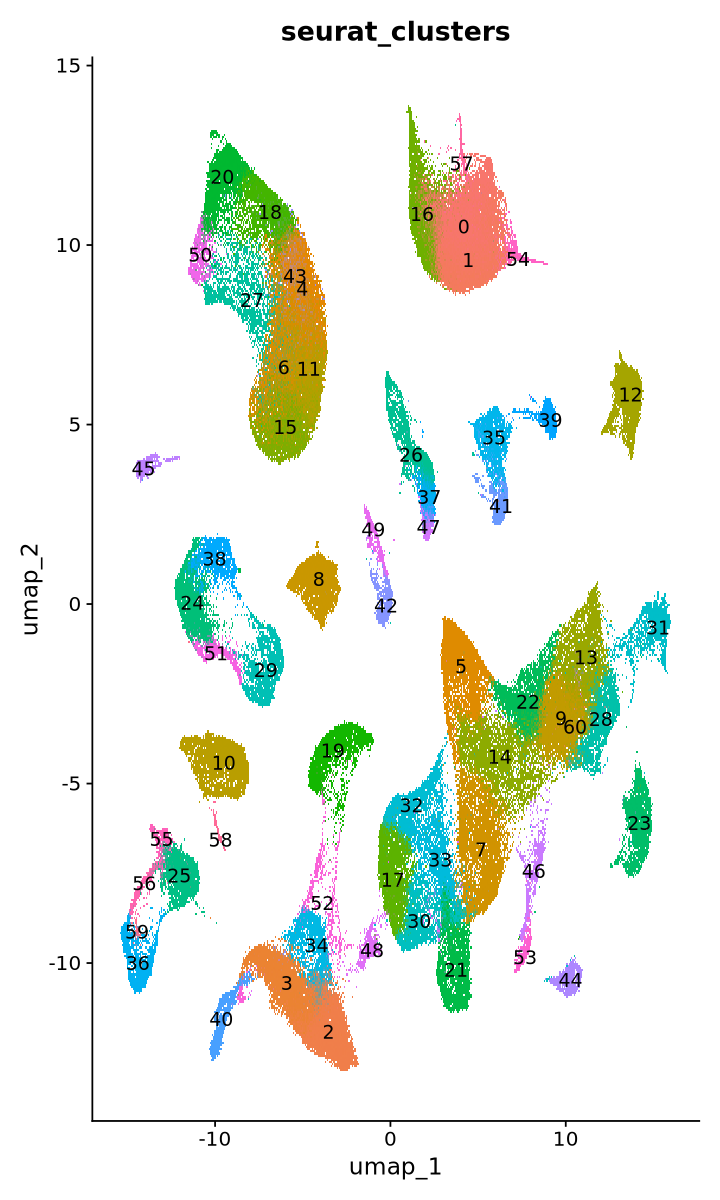

In [65]:
DefaultAssay(data_clean2) <- "SCT"
#re-cluster filtered dataset
data_clean2 <- FindNeighbors(data_clean2, reduction = "integrated.dr", dims = 1:30)
data_clean2 <- FindClusters(data_clean2, resolution = 2)
data_clean2 <- RunUMAP(data_clean2, dims = 1:30, reduction = "integrated.dr")
DimPlot(data_clean2, reduction = "umap", group.by = c("seurat_clusters"), label = TRUE) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



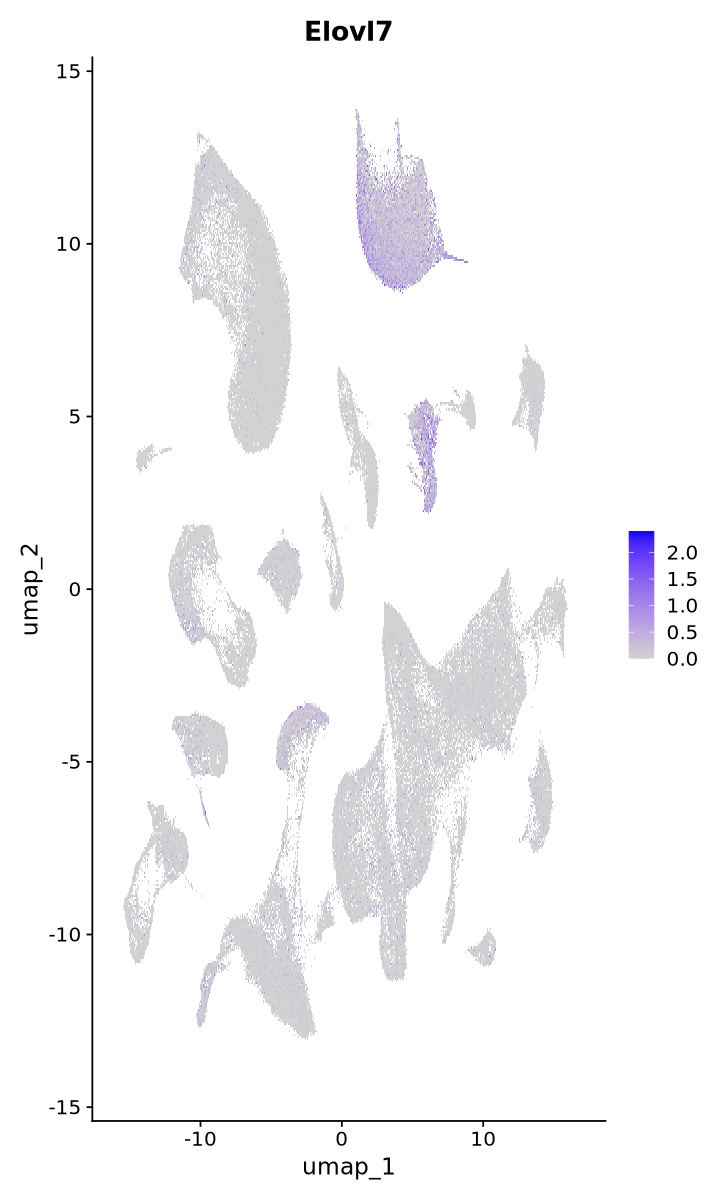

In [66]:
FeaturePlot(data_clean2, features = "Elovl7")

In [67]:
saveRDS(data_clean2, "SoupX_scT_Integrate_cleaned_round1_052724.rds")